In [5]:
import os, sys
sys.path.append(os.path.abspath(".."))


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from src.coefficient_model import CoefficientParams
from src.forecast import forecast_enrollment


In [7]:
df = pd.read_csv("../data/synthetic_enrollment.csv")
df.tail()


,year,students,annual_growth_rate_r,birth_rate_index,migration_index,school_attractiveness,policy_shock
9,2021,28,-0.028963,0.955178,0.986127,0.974795,0.00
10,2022,28,0.014386,0.999459,0.972098,0.975266,0.03
11,2023,28,-0.015996,0.988718,0.972069,1.019518,0.00
12,2024,27,-0.017698,0.959673,1.004369,1.022298,0.00
13,2025,27,-0.013340,0.983817,0.994618,1.016295,0.00


In [8]:
scenarios = {
    "Pessimistic": -0.02,   # choc démographique négatif
    "Baseline": 0.00,       # continuité actuelle
    "Optimistic": 0.02      # regain d’attractivité / politique éducative
}

results = []

for name, adj in scenarios.items():
    forecast = forecast_enrollment(
        df,
        years_ahead=3,
        scenario_adjustment=adj
    )
    forecast["scenario"] = name
    results.append(forecast)

df_forecast = pd.concat(results)
df_forecast


,year,students_forecast,assumed_growth_rate_r,scenario_adjustment,scenario
0,2026,26,-0.030588,-0.02,Pessimistic
1,2027,25,-0.030588,-0.02,Pessimistic
2,2028,25,-0.030588,-0.02,Pessimistic
0,2026,27,-0.010588,0.00,Baseline
1,2027,26,-0.010588,0.00,Baseline
2,2028,26,-0.010588,0.00,Baseline
0,2026,27,0.009412,0.02,Optimistic
1,2027,28,0.009412,0.02,Optimistic
2,2028,28,0.009412,0.02,Optimistic


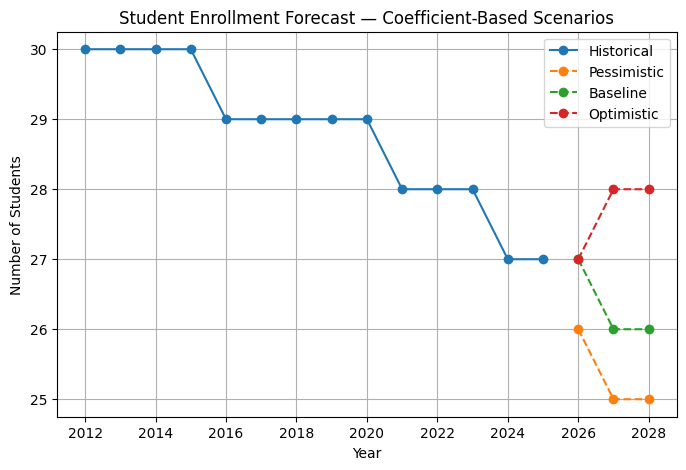

In [9]:
plt.figure(figsize=(8,5))

# Historique
plt.plot(df["year"], df["students"], marker="o", label="Historical")

# Scénarios
for scenario in df_forecast["scenario"].unique():
    tmp = df_forecast[df_forecast["scenario"] == scenario]
    plt.plot(
        tmp["year"],
        tmp["students_forecast"],
        marker="o",
        linestyle="--",
        label=scenario
    )

plt.title("Student Enrollment Forecast — Coefficient-Based Scenarios")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### Interpretation

This notebook demonstrates a coefficient-based forecasting approach
to simulate future student enrollment.

Small variations in the growth coefficient (±2%) lead to meaningful
differences in enrollment within only three years.

This illustrates how interpretable, lightweight models can support
strategic decision-making before deploying more complex AI systems.
